# Bike Demand Prediction

In [1]:
# importing requried library

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from math import sqrt
import time
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

%matplotlib inline


In [2]:
# Reading dataset
raw_data = pd.read_csv("day.csv")

In [3]:
raw_data.cnt.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [4]:
raw_data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [5]:
raw_data.shape

(731, 16)

We have 731 observations, 15 predictors and 1 target variable. Cnt is our target variable. 
Next examining variable types

In [6]:
raw_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In the dataset season, yr, mnth, holiday, weekday, workingday, weathersit predictors should be categorical type, but they are int64. In the next step mapping and categorical transformatin will be performed.

In [8]:
#converting to categorical variable

categorical_variable = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

for var in categorical_variable:
    raw_data[var] = raw_data[var].astype("category")

In [9]:
raw_data.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


Droping variables which are not requried.
1. instant - index number
2. dteday- all the requried like month week day all ready present
3. casual and resgistered - their sum is equal to cnt ie. to the target variable

In [10]:
raw_data = raw_data.drop(["instant","dteday"],axis = 1)

## Missing value Analysis

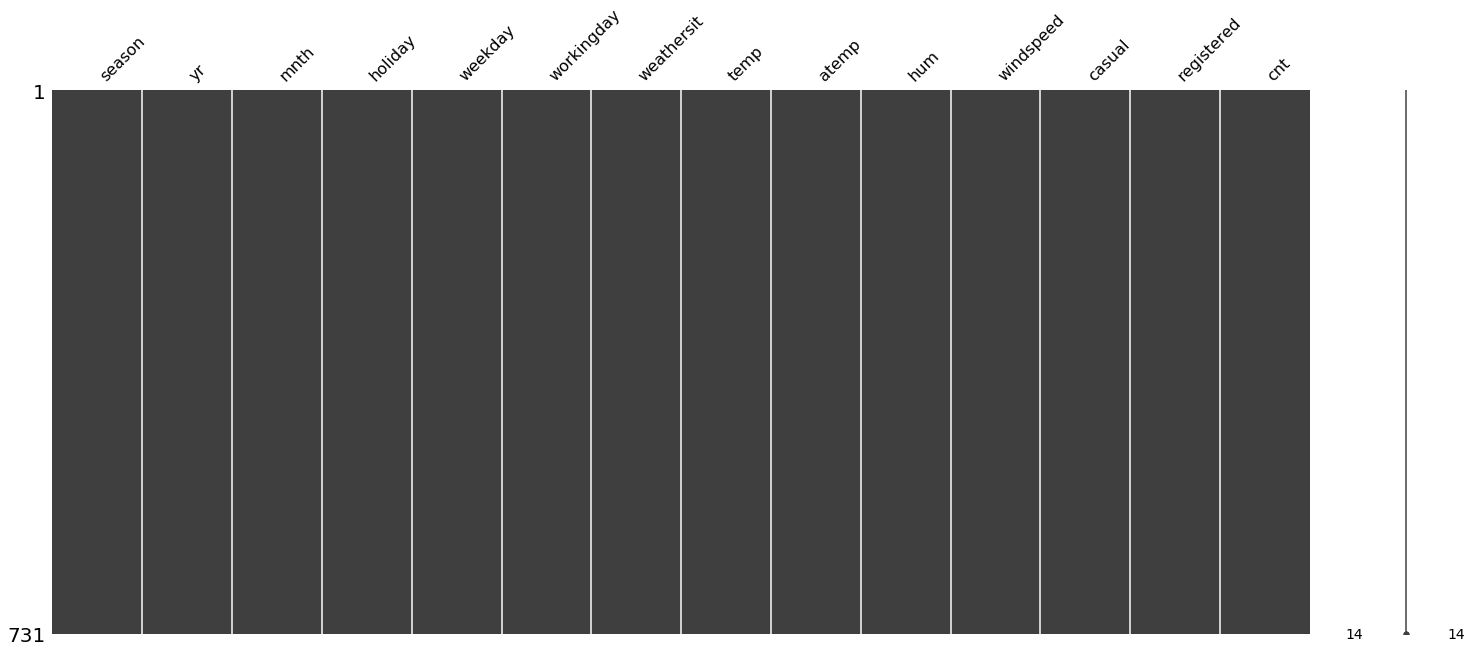

In [11]:
# We will perform missing value andlysis using missingno package
msno.matrix(raw_data)

There are no missing values present in the dataset

   ## Outliers Analysis

[Text(0,0.5,'cnt'),
 Text(0.5,0,'workingday'),
 Text(0.5,1,'Boxplot for cnt vs workingday')]

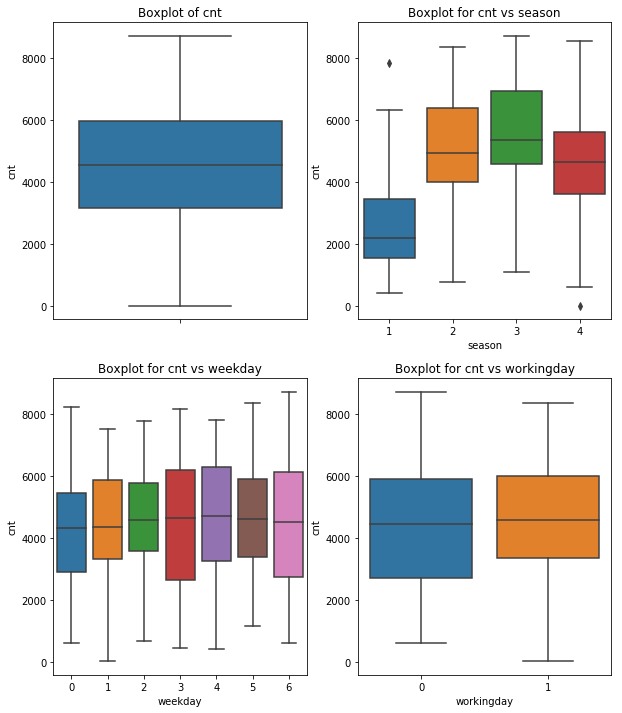

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,12)
sn.boxplot(data=raw_data,y="cnt",orient='v',ax=axes[0][0])
sn.boxplot(data=raw_data,y="cnt",x="season",orient='v',ax=axes[0][1])
sn.boxplot(data=raw_data,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sn.boxplot(data=raw_data,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='cnt',title = "Boxplot of cnt")
axes[0][1].set(xlabel="season",ylabel="cnt",title="Boxplot for cnt vs season")
axes[1][0].set(xlabel="weekday", ylabel="cnt",title="Boxplot for cnt vs weekday")
axes[1][1].set(xlabel="workingday",ylabel="cnt",title="Boxplot for cnt vs workingday")


Text(0.5,1,'Boxplot of cnt vs weathersit')

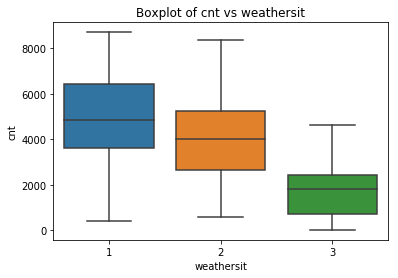

In [13]:
fig.set_size_inches(8,12)
sn.boxplot(data=raw_data, x="weathersit",y="cnt").set_title("Boxplot of cnt vs weathersit")

From the above boxplots, it is evident that there are no outliers present in the cnt. Two things are clear.
1. Cnt is very low in spring season.
2. Cnt is maximum when weather is good and its minimum weather is bab.

## Correlation Analysis

In [14]:
churn_corr = raw_data.corr()
cmap = cmap=sn.diverging_palette(15, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

churn_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '90px', 'font-size': '15pt'})\
    .set_caption("Correlation matrix")\
    .set_precision(2)\
    .set_table_styles(magnify())

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.99,1,0.14,-0.18,0.54,0.54,0.63
hum,0.13,0.14,1,-0.25,-0.077,-0.091,-0.1
windspeed,-0.16,-0.18,-0.25,1,-0.17,-0.22,-0.23
casual,0.54,0.54,-0.077,-0.17,1,0.4,0.67
registered,0.54,0.54,-0.091,-0.22,0.4,1,0.95
cnt,0.63,0.63,-0.1,-0.23,0.67,0.95,1


Finding of correlation analysis - 
1. temp and atemp are highly correlated.
2. temp and atemp have positive and strong coorelation with cnt.
3. hum and windspeed have negative and weak correlation with cnt.


## Bivariate analysis

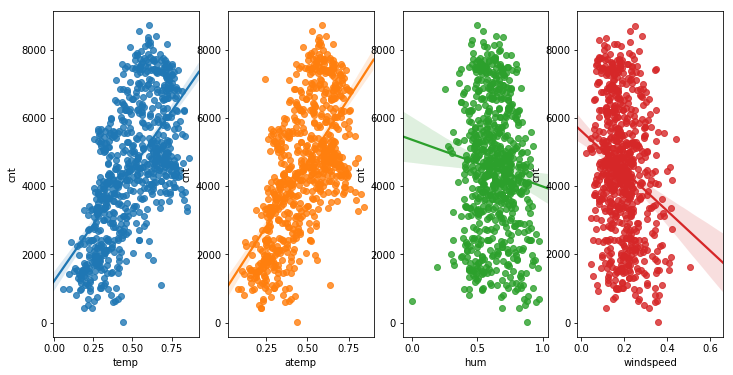

In [15]:
# Bivariate analysis of cnt and continous predictor

fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(12,6)

sn.regplot(x="temp",y="cnt",data=raw_data,ax=ax1)
sn.regplot(x="atemp",y="cnt",data=raw_data,ax=ax2)
sn.regplot(x="hum",y="cnt",data=raw_data,ax=ax3)
sn.regplot(x="windspeed",y="cnt",data=raw_data,ax=ax4)

From the above plot, it is evident that cnt has a positive linear relationship with temp and atemp.
On the other hand, cnt has a negative linear relationship with windspeed.
Humidity(hum) has a little negative linear relationship with cnt.

## Distribution of target Variable

C:\Users\Rohit\AppData\Local\conda\conda\envs\ggpy36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.10612952, -2.83371839, -2.68121219, -2.57340905, -2.48915191,
         -2.41955673, -2.36001798, -2.30782877, -2.26125818, -2.21912992,
         -2.18060696, -2.14507173, -2.11205508, -2.08119197, -2.05219258,
         -2.0248228 , -1.99889075, -1.97423711, -1.95072808, -1.92825019,
         -1.90670633, -1.88601273, -1.8660966 , -1.84689427, -1.82834975,
         -1.81041348, -1.79304141, -1.77619419, -1.75983653, -1.74393663,
         -1.72846577, -1.71339788, -1.69870925, -1.68437825, -1.67038506,
         -1.6567115 , -1.64334086, -1.63025771, -1.6174478 , -1.60489794,
         -1.59259587, -1.58053022, -1.56869036, -1.55706641, -1.54564912,
         -1.53442983, -1.52340042, -1.51255328, -1.50188124, -1.49137757,
         -1.4810359 , -1.47085025, -1.46081495, -1.45092464, -1.44117426,
         -1.431559  , -1.4220743 , -1.41271583, -1.40347947, -1.39436132,
         -1.38535765, -1.3764649 , -1.36767969, -1.35899879, -1.35041911,
         -1.3419377 , -1.33355173, -1.

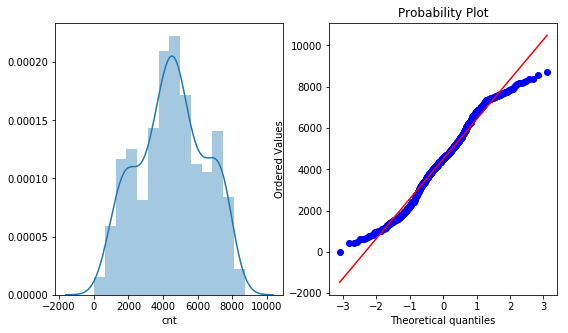

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(9,5)
sn.distplot(raw_data["cnt"],ax=ax1)
stats.probplot(raw_data["cnt"], dist='norm', fit=True, plot=ax2)

As we can see, out cnt variable is very close to normal distribution.

Preprocessing original data and Spliting into train and test data

In [17]:
# selecting predictors
train_feature_space = raw_data.iloc[:,raw_data.columns != 'cnt']
# selecting target class
target_class = raw_data.iloc[:,raw_data.columns == 'cnt']

In [18]:
#droping atemp due to multicollinearity
#droping casual and registered because there sum is equal to target variable ie. 'cnt'

train_feature_space = train_feature_space.drop(["atemp","casual","registered"],axis = 1)

In [19]:
train_feature_space.shape

(731, 10)

In [20]:
# creating training and test set
training_set, test_set, train_taget, test_target = train_test_split(train_feature_space,
                                                                    target_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 456)

# Cleaning test sets to avoid future warning messages
train_taget = train_taget.values.ravel() 
test_target = test_target.values.ravel()


## Model1 Linear Regression Model


In [21]:
X = training_set
X = sm.add_constant(X) 
y= np.log(train_taget)

model = sm.OLS(y, X.astype(float)).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     94.40
Date:                Fri, 03 Aug 2018   Prob (F-statistic):          2.20e-108
Time:                        13:51:38   Log-Likelihood:                -184.70
No. Observations:                 511   AIC:                             391.4
Df Residuals:                     500   BIC:                             438.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6112      0.110     69.224      0.000       7.395       7.827
season         0.1286      0.026      4.865      0.000       0.077       0.180
yr             0.4818      0.031     15.339      0.000       0.420       0.543
mnth          -0.0069      0.008     -0.834      0.405      -0.023       0.009
holiday       -0.1800      0.099     -1.815      0.070      -0.375       0.015
weekday        0.0133      0.008      1.670      0.095      -0.002       0.029
workingday     0.0577      0.035      1.655      0.099      -0.011       0.126
weathersit    -0.2331      0.037     -6.228      0.000      -0.307      -0.160
temp           1.5244      0.094     16.269      0.000       1.340       1.708
hum           -0.2495      0.149     -1.677      0.094      -0.542       0.043
windspeed     -1.0399      0.218     -4.760      0.000      -1.469      -0.611
==============================================================================
Omnibus:                      654.553   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128684.713
Skew:                          -6.061   Prob(JB):                         0.00
Kurtosis:                      79.792   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Initialize logistic regression model
lModel = LinearRegression()
lModel.fit(X = training_set,y = np.log(train_taget))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
#predicting using linear regression
lmPredictions = lModel.predict(X=test_set)

In [25]:
x=pd.DataFrame(np.exp(lmPredictions))

In [26]:
x.describe()

,0
count,220.000000
mean,4438.291596
std,2120.623071
min,1034.553984
25%,2730.336107
50%,4096.304410
75%,5708.079487
max,11000.217123


In [27]:
lm_errors = abs(np.exp(lmPredictions) - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lm_errors), 2), 'degrees.')

Mean Absolute Error: 899.5 degrees.


In [28]:
rmse = sqrt(mean_squared_error(test_target, np.exp(lmPredictions)))

In [29]:
print("RMSE for test set in linear regression is :" , rmse)

RMSE for test set in linear regression is : 1222.1581373120364


Text(0,0.5,'Predictions')

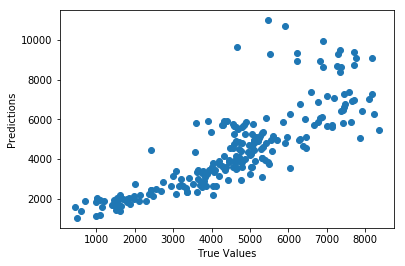

In [30]:
## The line / model
plt.scatter(test_target, np.exp(lmPredictions))
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Model2 Random forest

In [31]:
rf = RandomForestRegressor(random_state=12345)

In [32]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=12345, verbose=0,
           warm_start=False)

In [33]:
np.random.seed(12)
start = time.time()

# selecting best max_depth, maximum features, split criterion and number of trees
param_dist = {'max_depth': [2,4,6,8,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2',None],
              "n_estimators" : [100 ,200 ,300 ,400 ,500]
             }
cv_randomForest = RandomizedSearchCV(rf, cv = 10,
                     param_distributions = param_dist, 
                     n_iter = 10)

cv_randomForest.fit(training_set, train_taget)
print('Best Parameters using random search: \n', 
      cv_randomForest.best_params_)
end = time.time()
print('Time taken in random search: {0: .2f}'.format(end - start))

Best Parameters using random search: 
 {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}
Time taken in random search:  105.77


In [34]:
# setting parameters

# Set best parameters given by random search # Set be 
rf.set_params( max_features = 'log2',
               max_depth =8 ,
               n_estimators = 300
                )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=12345, verbose=0,
           warm_start=False)

In [35]:
rf.fit(training_set, train_taget)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=12345, verbose=0,
           warm_start=False)

In [36]:
# Use the forest's predict method on the test data
rfPredictions = rf.predict(test_set)
# Calculate the absolute errors
rf_errors = abs(rfPredictions - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'degrees.')

Mean Absolute Error: 495.33 degrees.


In [37]:
rmse_rf = sqrt(mean_squared_error(test_target, rfPredictions))

In [38]:
print("RMSE for test set in random forest regressor  is :" , rmse_rf)

RMSE for test set in random forest regressor  is : 649.7450571768651


### Variable importance for random forest

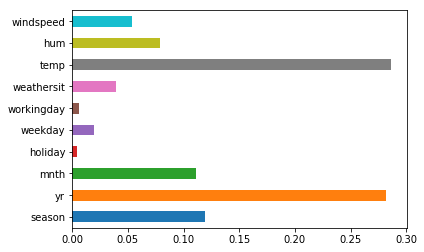

In [39]:
feature_importance =  pd.Series(rf.feature_importances_, index=training_set.columns)
feature_importance.plot(kind='barh')

In [41]:
#model input and output
pd.DataFrame(test_set).to_csv('InputLinearRegressionRandomForestPyhon.csv', index = False)
pd.DataFrame(np.exp(lmPredictions), columns=['predictions']).to_csv('outputLinearRegressionPython.csv')
pd.DataFrame(rfPredictions, columns=['predictions']).to_csv('outputRandomForestPython.csv')

